# 분류 모델 실습

## pima-indians-diabetes.csv 파일을 읽어서, 당뇨병을 분류하는 모델을 만드시오.

컬럼 정보 :

Preg=no. of pregnancy

Plas=Plasma

Pres=blood pressure

skin=skin thickness

test=insulin test

mass=body mass

pedi=diabetes pedigree function

age=age

class=target(diabetes of not, 1:diabetic, 0:not diabetic)

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/pima-indians-diabetes.csv')

In [4]:
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isna().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [8]:
# 데이터가 없어서, 0으로 셋팅하는 경우가 실제로 많이 있다.
# 그래서, 0으로 셋팅된 값을, Nan으로 바꿔준다.

In [9]:
df.head(3)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [13]:
import numpy as np

In [15]:
df.loc[ :,'Plas':'age'] = df.loc[ :,'Plas':'age'].replace(0, np.nan)

In [16]:
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [17]:
df.isna().sum()

Preg       0
Plas       5
Pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64

In [18]:
df.shape

(768, 9)

In [19]:
# 1 . nan 을 없애고, 인공지능 개발

In [20]:
df.dropna()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


In [21]:
# 2. 다른값으로 채우는 방법

In [23]:
df.mean() 

Preg       3.845052
Plas     121.686763
Pres      72.405184
skin      29.153420
test     155.548223
mass      32.457464
pedi       0.471876
age       33.240885
class      0.348958
dtype: float64

In [25]:
df = df.fillna( df.mean() )

In [26]:
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [27]:
y = df['class']

In [29]:
X = df.iloc[ : , 0 : -2+1 ]

In [30]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [31]:
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [32]:
# 당뇨병인 사람은 몇명이고, 아닌사람은 몇명인가 확인

In [35]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [37]:
import seaborn as sb

In [40]:
import matplotlib.pyplot as plt

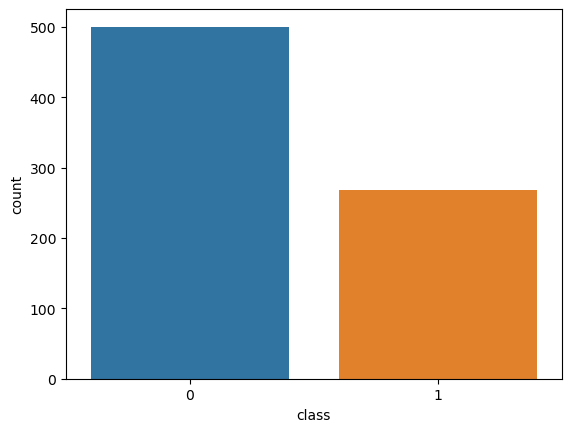

In [41]:
sb.countplot(data= df, x='class')
plt.show()

In [42]:
# 당뇨병인 사람의 데이터가 훨씬 적으니까,
# up sampling 기법으로, 당뇨병 데이터를 늘린다.

In [43]:
# imblearn 라이브러리를 이용하기 위해서
# 설치한다.

In [45]:
# Synthetic Minority Over-sampling Technique
from imblearn.over_sampling import SMOTE

In [47]:
sm = SMOTE(random_state=2)

In [49]:
X, y = sm.fit_resample(X, y)

In [50]:
X

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148.000000,72.000000,35.000000,155.548223,33.600000,0.627000,50
1,1,85.000000,66.000000,29.000000,155.548223,26.600000,0.351000,31
2,8,183.000000,64.000000,29.153420,155.548223,23.300000,0.672000,32
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33
...,...,...,...,...,...,...,...,...
995,4,112.068692,72.931308,34.396961,104.793923,31.326706,0.583229,31
996,9,123.496400,57.282629,30.617023,155.548223,34.988795,0.970132,34
997,8,149.874944,82.500045,45.750067,238.499955,36.475033,0.972876,46
998,5,97.007387,84.532841,30.670194,155.548223,31.629886,0.785759,58


In [51]:
y

0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: class, Length: 1000, dtype: int64

In [54]:
y.value_counts()

1    500
0    500
Name: class, dtype: int64

In [55]:
# 피처 스케일링

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler_X = MinMaxScaler()

In [59]:
X = scaler_X.fit_transform(X)

In [61]:
X

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.47058824, 0.68306416, 0.59693923, ..., 0.37372257, 0.38209899,
        0.41666667],
       [0.29411765, 0.34198314, 0.61768205, ..., 0.2746398 , 0.30220266,
        0.61666667],
       [0.        , 0.34402566, 0.57699704, ..., 0.33521187, 0.10780082,
        0.03333333]])

In [62]:
# training / test 로 분리

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [65]:
# 모델링

In [66]:
from sklearn.linear_model import LogisticRegression

In [68]:
classifier = LogisticRegression(random_state=2)

In [69]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=2)

In [70]:
# 검증

In [73]:
y_pred = classifier.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [76]:
cm = confusion_matrix(y_test, y_pred)

In [77]:
cm

array([[73, 18],
       [30, 79]], dtype=int64)

In [75]:
accuracy_score(y_test, y_pred)

0.76

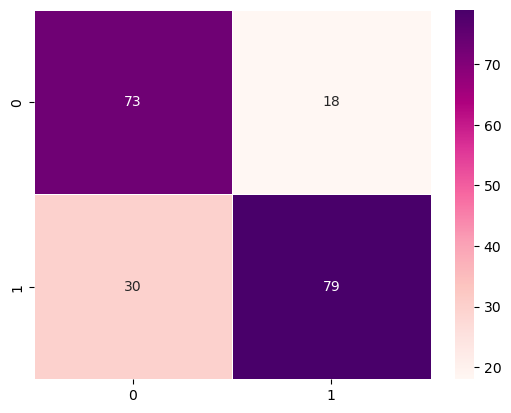

In [78]:
sb.heatmap(data= cm, annot=True, cmap='RdPu', linewidths=0.7)
plt.show()

In [79]:
classifier.coef_

array([[2.01772717, 4.29017013, 0.21590336, 1.08492992, 0.20790181,
        2.55976259, 2.19968157, 0.47656263]])

In [80]:
classifier.intercept_

array([-4.44549499])